In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = './tacobel.csv'
tacobel_data = pd.read_csv(file_path, delimiter='\t')
tacobel_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
tacobel_data.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [8]:
tacobel_data['item_price'] = tacobel_data['item_price'].str.replace("$","").astype(float)
tacobel_data['choice_description'].fillna('none', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9284\2245266086.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tacobel_data['choice_description'].fillna('none', inplace=True)


In [10]:
sales_analysis = tacobel_data.groupby('item_name').agg(
    Total_Order = pd.NamedAgg(column='quantity', aggfunc='sum'),
    Total_Sales = pd.NamedAgg(column='item_price', aggfunc='sum')
).reset_index().sort_values(by='Total_Sales', ascending=False)

sales_analysis.head()


,item_name,Total_Order,Total_Sales
17,Chicken Bowl,761,7342.73
18,Chicken Burrito,591,5575.82
39,Steak Burrito,386,3851.43
38,Steak Bowl,221,2260.19
25,Chips and Guacamole,506,2201.04


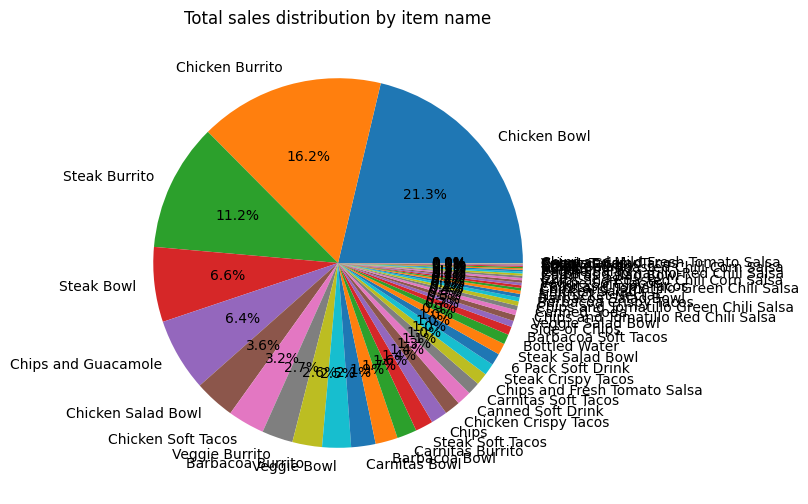

In [11]:
plt.figure(figsize=(10, 6))
plt.pie(sales_analysis['Total_Sales'], labels=sales_analysis['item_name'], autopct='%1.1f%%')
plt.title('Total sales distribution by item name')
plt.show()
